In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
 inspect(engine).get_table_names()

['measurement', 'station']

In [8]:
 inspect(engine).get_columns('station') 

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [6]:
[ x['name'] for x in inspect(engine).get_columns('measurement') ]

['id', 'station', 'date', 'prcp', 'tobs']

In [7]:
[ x['name'] for x in inspect(engine).get_columns('station') ]

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']

In [9]:
# reflect an existing database into a new model
Base = automap_base()

In [10]:
Base.classes.keys()

[]

In [11]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [12]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [15]:
# Save references to each table
Station = Base.classes.station

Measurement = Base.classes.measurement

In [16]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [17]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).first()[0]
most_recent_date

'2017-08-23'

In [18]:
results

NameError: name 'results' is not defined

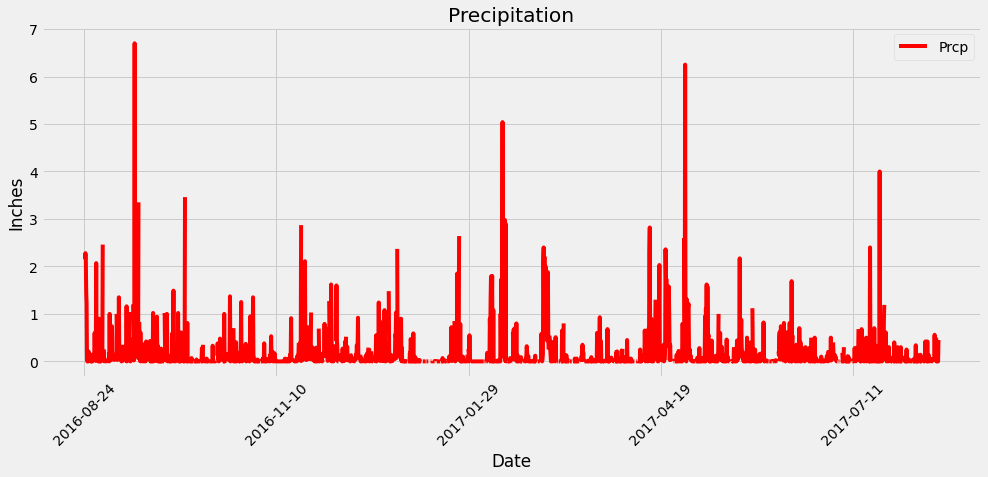

In [27]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

one_year_ago = dt.datetime.strptime(most_recent_date, '%Y-%m-%d') - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > one_year_ago).all()
# Save the query results as a Pandas DataFrame and set the index to the date column


df = pd.DataFrame(data=results, columns=['Date', "Prcp"])
df2 = pd.DataFrame(data=results, columns=['Date', "Prcp"]).set_index('Date').rename_axis(None)

# Sort the dataframe by date
df = df.sort_values(by='Date')
df2 = df2.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data

df.plot(x="Date", y='Prcp', rot=45, figsize=(15,6),ylabel='Inches',title='Precipitation',color='r')
plt.show()

In [28]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [30]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.station)).first()[0]

9

In [33]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

session.query(func.count(Measurement.tobs), 
                Measurement.station).group_by(Measurement.station)\
                .order_by(func.count(Measurement.tobs).desc()).all()

[(2772, 'USC00519281'),
 (2724, 'USC00519397'),
 (2709, 'USC00513117'),
 (2669, 'USC00519523'),
 (2612, 'USC00516128'),
 (2202, 'USC00514830'),
 (1979, 'USC00511918'),
 (1372, 'USC00517948'),
 (511, 'USC00518838')]

In [45]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
result = session.query(func.min(Measurement.tobs),
             func.max(Measurement.tobs),
             func.avg(Measurement.tobs))\
                .filter(Measurement.station == 'USC00519281')\
                .first()
{'Low':result[0],'Max':result[1],'Avg':round(result[2],2)}

{'Low': 54.0, 'Max': 85.0, 'Avg': 71.66}

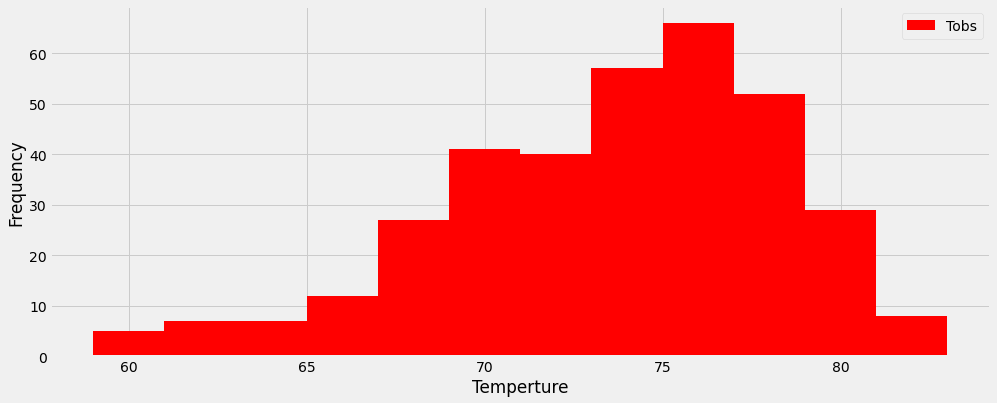

In [48]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
hist = session.query(Measurement.tobs).filter((Measurement.station == 'USC00519281')&
                                              (Measurement.date > one_year_ago)).all()

hist_df = pd.DataFrame(data=hist, columns=['Tobs'])

hist_df.plot.hist(bins=12,figsize=(15,6),color='r')
plt.xlabel('Temperture')
plt.show()

# Close session

In [49]:
# Close Session
session.close()